In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

# Creating a dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7],
    'Attendance': [50, 60, 70, 80, 85, 90, 95],
    'Pass_Fail': [0, 0, 0, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Splitting features and target variable
X = df[['Study_Hours', 'Attendance']]
y = df['Pass_Fail']

# Train Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)




DecisionTreeClassifier(max_depth=3, random_state=42)

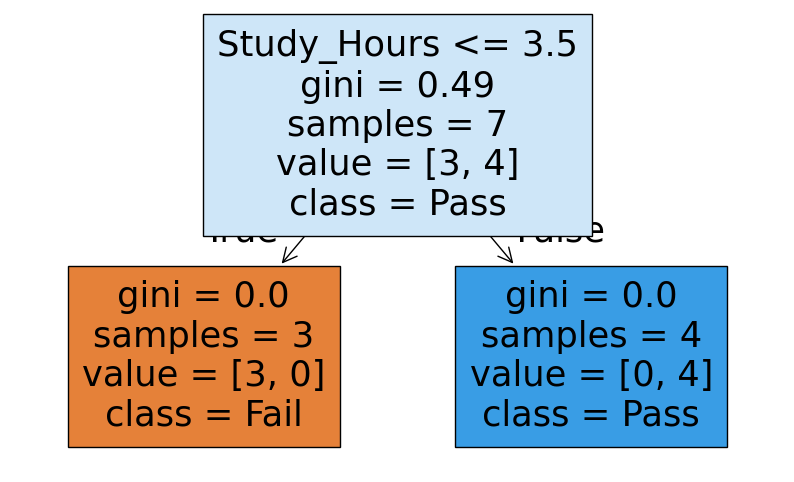

|--- Study_Hours <= 3.50
|   |--- class: 0
|--- Study_Hours >  3.50
|   |--- class: 1



In [2]:
# Visualizing the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(model, feature_names=['Study_Hours', 'Attendance'], class_names=['Fail', 'Pass'], filled=True)
plt.show()

# Print decision rules
tree_rules = export_text(model, feature_names=['Study_Hours', 'Attendance'])
print(tree_rules)

In [3]:
new_student = np.array([[3, 75]])  # Example: 3 hours of study, 75% attendance
prediction = model.predict(new_student)
print("Predicted Outcome:", "Pass" if prediction[0] == 1 else "Fail")


Predicted Outcome: Fail


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini",        # Use Gini Index for splits
    max_depth=3,             # Limit tree depth to prevent overfitting
    min_samples_split=4,     # Node must have at least 4 samples to split
    min_samples_leaf=2,      # Each leaf must contain at least 2 samples
    max_features="sqrt",     # Use sqrt(number of features) for best split
    random_state=42          # Ensures reproducibility
)

model.fit(X, y)  # Train the decision tree


DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

Model Accuracy: 1.00


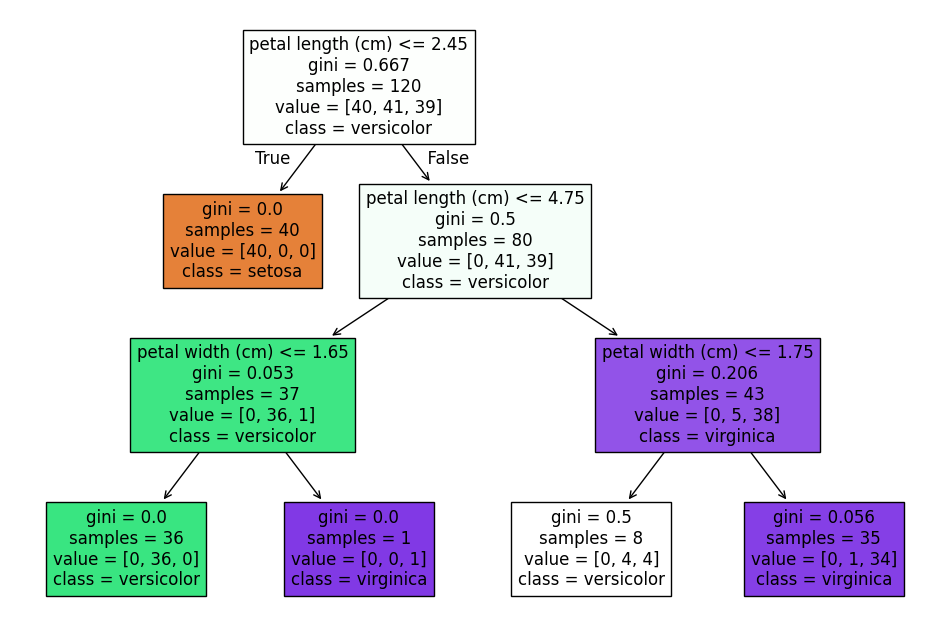

In [5]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Convert categorical features into numerical
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = df.drop(columns=['tip'])  # Features (Total bill, size, encoded categories)
y = df['tip']  # Target variable (Tip amount)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize DecisionTreeRegressor with parameters
regressor = DecisionTreeRegressor(
    max_depth=4,                # Limit tree depth to prevent overfitting
    min_samples_split=5,        # Minimum samples required to split a node
    criterion="squared_error",  # Use squared error for split evaluation
    random_state=42             # Ensures reproducibility
)

# Train the model
regressor.fit(X_train, y_train)

# Predict test data
y_pred = regressor.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.20
R-squared (R²) Score: 0.04


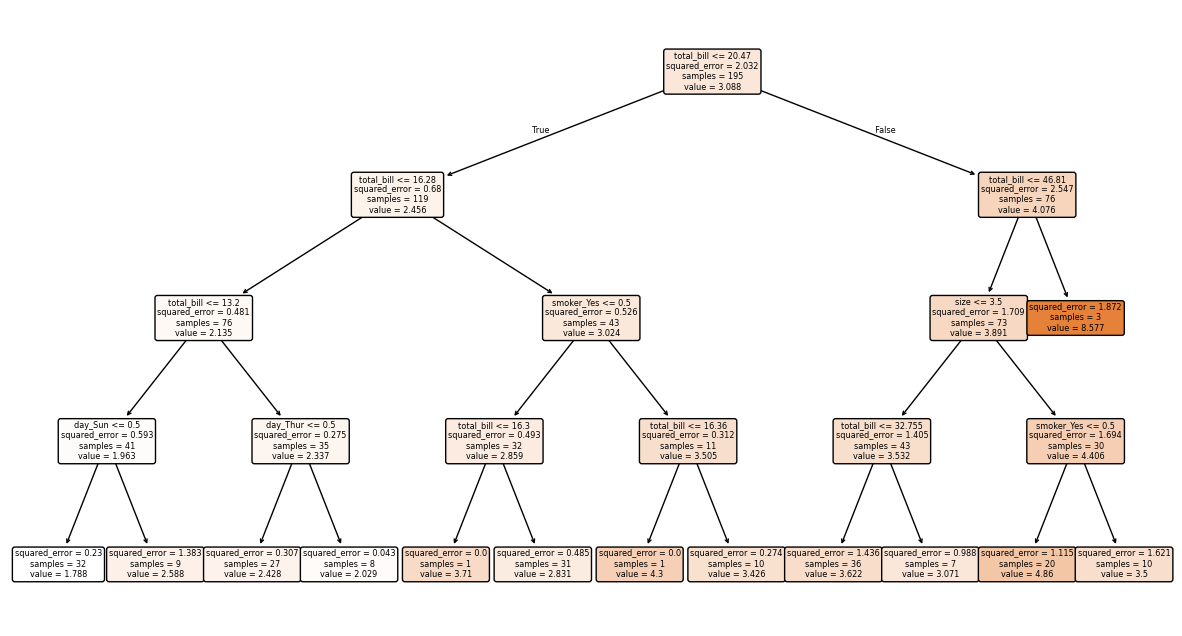

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()
